In [1]:
import numpy as np 
import pandas as pd
import sklearn
import pydotplus

In [2]:
my_data=pd.read_csv(r"F:\databases\pulsar_stars.csv")
print(my_data)

        Mean_of_the_integrated_profile  \
0                           140.562500   
1                           102.507812   
2                           103.015625   
3                           136.750000   
4                            88.726562   
...                                ...   
17893                       136.429688   
17894                       122.554688   
17895                       119.335938   
17896                       114.507812   
17897                        57.062500   

        Standard_deviation_of_the_integrated_profile  \
0                                          55.683782   
1                                          58.882430   
2                                          39.341649   
3                                          57.178449   
4                                          40.672225   
...                                              ...   
17893                                      59.847421   
17894                                      49.4

In [3]:
train_set=my_data.iloc[:14319,:9]
print(train_set)

        Mean_of_the_integrated_profile  \
0                           140.562500   
1                           102.507812   
2                           103.015625   
3                           136.750000   
4                            88.726562   
...                                ...   
14314                       119.039062   
14315                       104.335938   
14316                       127.289062   
14317                       164.812500   
14318                       136.445312   

        Standard_deviation_of_the_integrated_profile  \
0                                          55.683782   
1                                          58.882430   
2                                          39.341649   
3                                          57.178449   
4                                          40.672225   
...                                              ...   
14314                                      49.247526   
14315                                      50.5

In [4]:
test_set=my_data.iloc[14319:17898,:9]
print(test_set)

        Mean_of_the_integrated_profile  \
14319                        94.109375   
14320                       146.359375   
14321                       114.968750   
14322                       133.359375   
14323                       105.273438   
...                                ...   
17893                       136.429688   
17894                       122.554688   
17895                       119.335938   
17896                       114.507812   
17897                        57.062500   

        Standard_deviation_of_the_integrated_profile  \
14319                                      40.963443   
14320                                      53.171117   
14321                                      50.337600   
14322                                      43.407001   
14323                                      50.423010   
...                                              ...   
17893                                      59.847421   
17894                                      49.4

In [5]:
train_set_x=train_set.iloc[:,: -1]
train_set_y=train_set.iloc[:,-1]

test_set_x=test_set.iloc[:,: -1]
test_set_y=test_set.iloc[:,-1]

In [6]:
from sklearn.tree import DecisionTreeClassifier
star_tree=DecisionTreeClassifier(criterion="entropy",max_depth=10)

print(star_tree)
star_tree.fit(train_set_x,train_set_y)

predict_tree=star_tree.predict(test_set_x)
print(predict_tree[0:5]) # predicted output labels of test dataset 
print(test_set_y[0:5])   # actual label of test dataset

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
[0 0 0 0 0]
14319    0
14320    0
14321    0
14322    0
14323    0
Name: target_class, dtype: int64


In [7]:
from sklearn import *
from sklearn.metrics import *
print("\ndecision tree accuracy:",metrics.accuracy_score(test_set_y,predict_tree))


decision tree accuracy: 0.9868678401788209


In [8]:
!pip install six

In [9]:
from sklearn.externals.six import StringIO
import pydotplus
from graphviz import *

featureNames = my_data.columns[0:8]
targetNames = my_data['target_class'].unique().tolist()
dot_data = StringIO()  #Text I/O implementation using an in-memory buffer.

#tree.export_graphviz(decision_tree, out_file=None, max_depth=None,
#                   feature_names=None, class_names=None, label='all',
#                   filled=False, leaves_parallel=False, impurity=True,
#                  node_ids=False, proportion=False, rotate=False,
#                 rounded=False, special_characters=False, precision=3):
#This function generates a GraphViz representation of the decision tree,
#which is then written into `out_file`

dot_data = tree.export_graphviz(star_tree, out_file=None ,
                                feature_names=featureNames,
                                filled=True, rotate=False)
#Load graph as defined by data in DOT format.
#The data is assumed to be in DOT format. 
#It will be parsed and a Dot class will be returned, representing the graph.
graph=pydotplus.graph_from_dot_data(dot_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [10]:
from graphviz import *

In [11]:
from sklearn import tree

In [12]:
tree.plot_tree(star_tree)

[Text(261.48177083333337, 352.79999999999995, 'X[2] <= 1.085\nentropy = 0.502\nsamples = 14319\nvalue = [12733, 1586]'),
 Text(125.81640625000001, 319.2, 'X[2] <= 0.346\nentropy = 0.136\nsamples = 12848\nvalue = [12604, 244]'),
 Text(39.153645833333336, 285.59999999999997, 'X[2] <= 0.089\nentropy = 0.045\nsamples = 9014\nvalue = [8970, 44]'),
 Text(10.333333333333334, 252.0, 'X[5] <= 18.103\nentropy = 0.01\nsamples = 4616\nvalue = [4612, 4]'),
 Text(7.75, 218.39999999999998, 'entropy = 0.0\nsamples = 2065\nvalue = [2065, 0]'),
 Text(12.916666666666668, 218.39999999999998, 'X[5] <= 18.104\nentropy = 0.017\nsamples = 2551\nvalue = [2547, 4]'),
 Text(10.333333333333334, 184.8, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(15.5, 184.8, 'X[4] <= 3.484\nentropy = 0.013\nsamples = 2550\nvalue = [2547, 3]'),
 Text(12.916666666666668, 151.2, 'X[4] <= 3.48\nentropy = 0.045\nsamples = 603\nvalue = [600, 3]'),
 Text(10.333333333333334, 117.60000000000002, 'X[0] <= 112.781\nentropy = 0.032\n

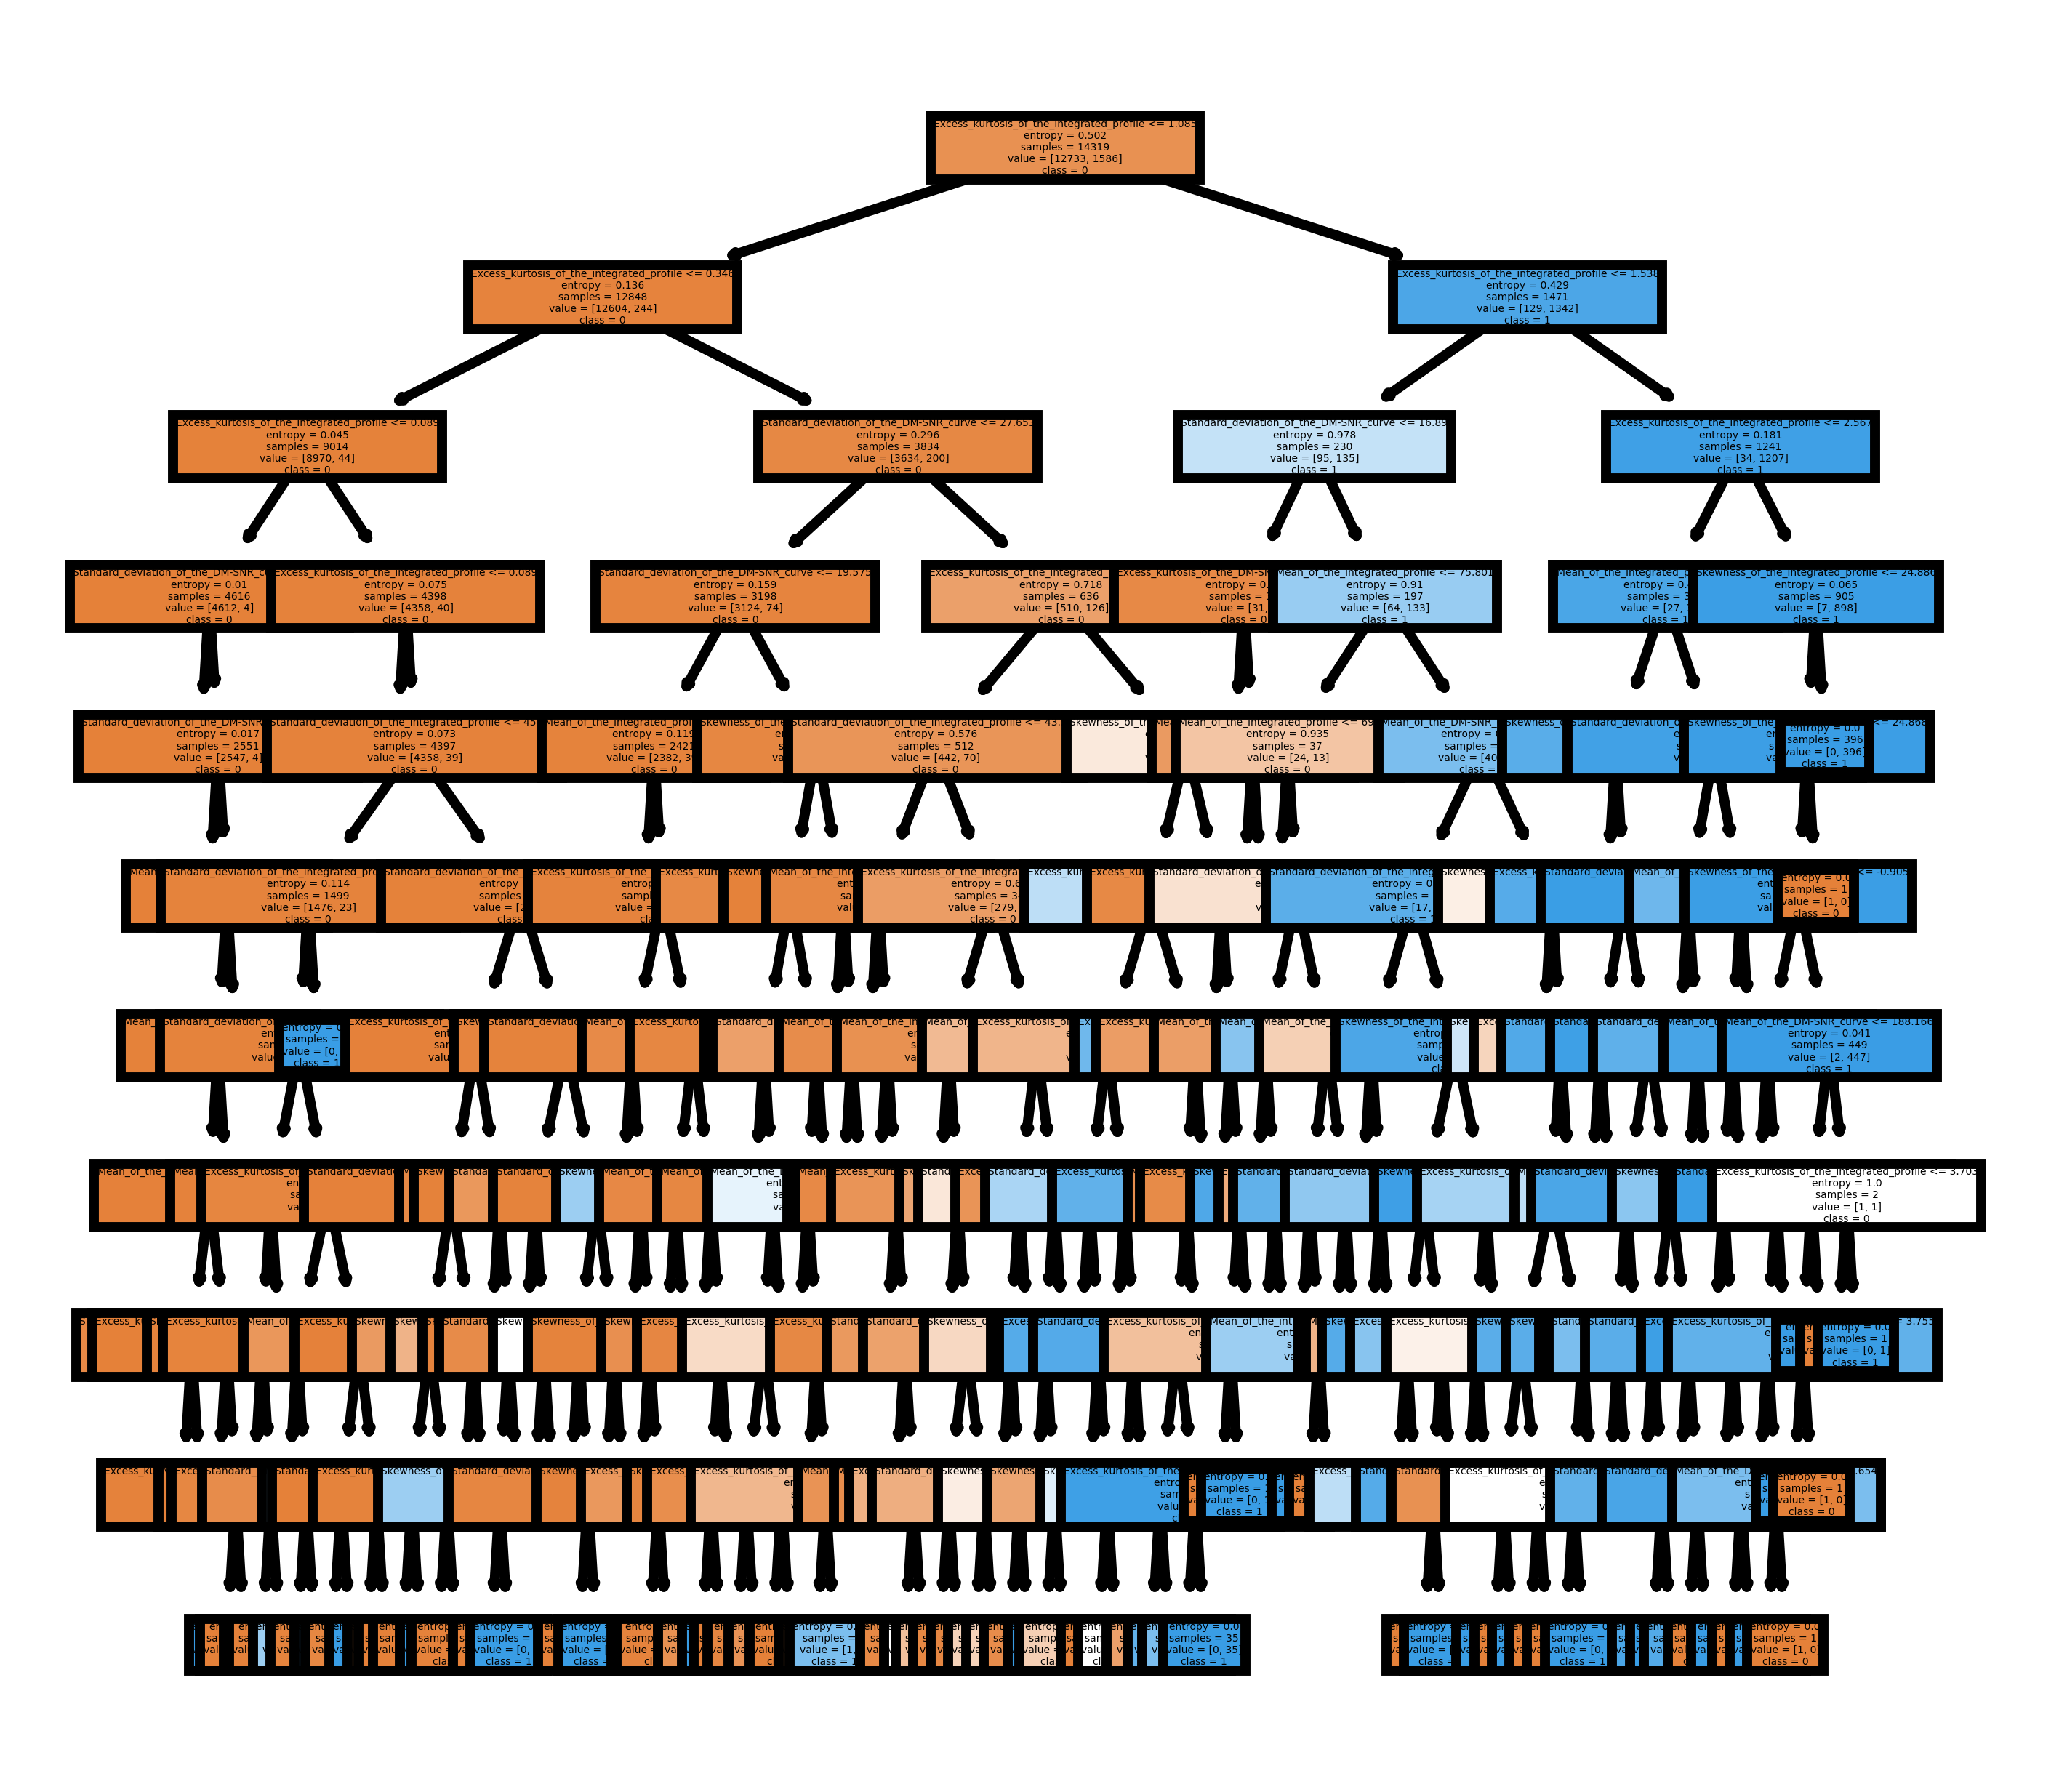

In [15]:
import matplotlib.pyplot as plt
fn=['Mean_of_the_integrated_profile','Standard_deviation_of_the_integrated_profile','Excess_kurtosis_of_the_integrated_profile','Skewness_of_the_integrated_profile','Mean_of_the_DM-SNR_curve','Standard_deviation_of_the_DM-SNR_curve','Excess_kurtosis_of_the_DM-SNR_curve','Skewness_of_the_DM-SNR_curve']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=1000)
tree.plot_tree(star_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')